In [1]:
import os
os.environ['HDF5_DISABLE_VERSION_CHECK']='1'
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow as tf
import keras

Num GPUs Available:  0


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [7]:
import pandas as pd
import numpy as np
import glob
df_t = pd.DataFrame()
for i in glob.glob('./data/bitcoin_*'):
    df_i = pd.read_excel(i)
    df_t = pd.concat([df_t, df_i])

In [8]:
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 100

In [9]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79145 entries, 0 to 2661
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   conversationId    79145 non-null  int64         
 1   coordinates       46 non-null     object        
 2   date              79145 non-null  datetime64[ns]
 3   dict              79145 non-null  object        
 4   hashtags          79145 non-null  object        
 5   id                79145 non-null  int64         
 6   id_str            79145 non-null  int64         
 7   inReplyToTweetId  20069 non-null  float64       
 8   inReplyToUser     18560 non-null  object        
 9   json              79145 non-null  object        
 10  lang              79145 non-null  object        
 11  likeCount         79145 non-null  int64         
 12  links             79145 non-null  object        
 13  media             79145 non-null  object        
 14  mentionedUsers    79145

In [10]:
df_t

,conversationId,coordinates,date,dict,hashtags,id,id_str,inReplyToTweetId,inReplyToUser,json,lang,likeCount,links,media,mentionedUsers,parse,place,quoteCount,quotedTweet,rawContent,replyCount,retweetCount,retweetedTweet,source,sourceLabel,sourceUrl,url,user,viewCount,d
0,816071549992235008,NaN,2017-01-02 23:59:54,"<bound method JSONTrait.dict of Tweet(id=816071549992235008, id_str='816071549992235008', url='https://twitter.com/MdfJumpers/status/816071549992235008', date=datetime.datetime(2017, 1, 2, 23, 59,...",[],816071549992235008,816071549992235008,NaN,NaN,"<bound method JSONTrait.json of Tweet(id=816071549992235008, id_str='816071549992235008', url='https://twitter.com/MdfJumpers/status/816071549992235008', date=datetime.datetime(2017, 1, 2, 23, 59,...",en,0,"[TextLink(url='https://tmblr.co/Z5Ow8i2GfhXFW', text='tmblr.co/Z5Ow8i2GfhXFW', tcourl='https://t.co/VQHSnDBmD9')]","Media(photos=[], videos=[], animated=[])",[],<function Tweet.parse at 0x7f0ce816a290>,NaN,0,NaN,📷 Bitcoin shoots to the moon It’s now gone up past $1000USD OR $1400 AUD Get onto it now before it’s... https://t.co/VQHSnDBmD9,0,0,NaN,"<a href=""https://www.tumblr.com/"" rel=""nofollow"">Tumblr</a>",Tumblr,https://www.tumblr.com/,https://twitter.com/MdfJumpers/status/816071549992235008,"User(id=4813776800, id_str='4813776800', url='https://twitter.com/MdfJumpers', username='MdfJumpers', displayname='the farmer', rawDescription='', created=datetime.datetime(2016, 1, 25, 20, 23, 33...",NaN,2017-01-02
1,816071541339418624,NaN,2017-01-02 23:59:51,"<bound method JSONTrait.dict of Tweet(id=816071541339418624, id_str='816071541339418624', url='https://twitter.com/BitcoinCryptos/status/816071541339418624', date=datetime.datetime(2017, 1, 2, 23,...",['bitcoin'],816071541339418624,816071541339418624,NaN,NaN,"<bound method JSONTrait.json of Tweet(id=816071541339418624, id_str='816071541339418624', url='https://twitter.com/BitcoinCryptos/status/816071541339418624', date=datetime.datetime(2017, 1, 2, 23,...",en,0,"[TextLink(url='http://bit.ly/1IAb8e4', text='bit.ly/1IAb8e4', tcourl='https://t.co/QwbVnMaWke')]","Media(photos=[], videos=[], animated=[])",[],<function Tweet.parse at 0x7f0ce816a290>,NaN,0,NaN,The Times 03/ Jan/2009 Chancellor on brink of second bailout for banks #bitcoin today! https://t.co/QwbVnMaWke,0,0,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",IFTTT,https://ifttt.com,https://twitter.com/BitcoinCryptos/status/816071541339418624,"User(id=3398197577, id_str='3398197577', url='https://twitter.com/BitcoinCryptos', username='BitcoinCryptos', displayname='Bitcoin News', rawDescription='We Tweet About #Bitcoin News, Information ...",NaN,2017-01-02
2,816071540022378496,NaN,2017-01-02 23:59:51,"<bound method JSONTrait.dict of Tweet(id=816071540022378496, id_str='816071540022378496', url='https://twitter.com/BitcoinCryptos/status/816071540022378496', date=datetime.datetime(2017, 1, 2, 23,...",['bitcoin'],816071540022378496,816071540022378496,NaN,NaN,"<bound method JSONTrait.json of Tweet(id=816071540022378496, id_str='816071540022378496', url='https://twitter.com/BitcoinCryptos/status/816071540022378496', date=datetime.datetime(2017, 1, 2, 23,...",en,0,"[TextLink(url='http://bit.ly/1IAb8e4', text='bit.ly/1IAb8e4', tcourl='https://t.co/QwbVnMaWke')]","Media(photos=[], videos=[], animated=[])",[],<function Tweet.parse at 0x7f0ce816a290>,NaN,0,NaN,On the frontpage of r/technology with lots of upvotes 😎 #bitcoin today! https://t.co/QwbVnMaWke,0,0,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",IFTTT,https://ifttt.com,https://twitter.com/BitcoinCryptos/status/816071540022378496,"User(id=3398197577, id_str='3398197577', url='https://twitter.com/BitcoinCryptos', username='BitcoinCryptos', displayname='Bitcoin News', rawDescription='We Tweet About #Bitcoin News, Information ...",NaN,2017-01-02
3,816071502814736384,NaN,2017-01-02 23:59:42,"<bound method JSONTrait.dict of Tweet(id=816071502814736384, id_str='816071502814736384', url='https

In [11]:
# drop duplicates
df_t = df_t.sort_values(['conversationId','date'], ascending=[True, False])
df_t['_id'] = df_t.groupby('conversationId')['date'].cumcount()+1

In [12]:
df_t = df_t[df_t['_id']==1]

In [13]:
import re
def extract_followers_count(text):
    followers_count_match = re.search(r'followersCount=(\d+)', text)

    if followers_count_match:
        followers_count = int(followers_count_match.group(1))
        return followers_count
    else:
        return 0

In [14]:
df_t['followersCount'] = df_t['user'].apply(extract_followers_count)

In [15]:
df_t

,conversationId,coordinates,date,dict,hashtags,id,id_str,inReplyToTweetId,inReplyToUser,json,lang,likeCount,links,media,mentionedUsers,parse,place,quoteCount,quotedTweet,rawContent,replyCount,retweetCount,retweetedTweet,source,sourceLabel,sourceUrl,url,user,viewCount,d,_id,followersCount
11267,1110302988,NaN,2021-01-10 23:59:41,"<bound method JSONTrait.dict of Tweet(id=1348419271358091266, id_str='1348419271358091266', url='https://twitter.com/ANT159694954/status/1348419271358091266', date=datetime.datetime(2021, 1, 10, 2...",[],1348419271358091008,1348419271358091266,1.110303e+09,"UserRef(id=9253672, username='halfin', displayname='halfin', _type='snscrape.modules.twitter.UserRef')","<bound method JSONTrait.json of Tweet(id=1348419271358091266, id_str='1348419271358091266', url='https://twitter.com/ANT159694954/status/1348419271358091266', date=datetime.datetime(2021, 1, 10, 2...",en,0,[],"Media(photos=[], videos=[], animated=[])","[UserRef(id=9253672, username='halfin', displayname='halfin', _type='snscrape.modules.twitter.UserRef'), UserRef(id=932271127648489473, username='fintwit_news', displayname='Fintwit', _type='snscr...",<function Tweet.parse at 0x00000169B7D75090>,NaN,0,NaN,@halfin @fintwit_news Running bitcoin i think its in reverse,0,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Twitter Web App,https://mobile.twitter.com,https://twitter.com/ANT159694954/status/1348419271358091266,"User(id=1012636259020361728, id_str='1012636259020361728', url='https://twitter.com/ANT159694954', username='ANT159694954', displayname='ANT1', rawDescription='LIFE IS WHAT YOU MAKE IT\nXRP TIPS r...",NaN,2021-01-10,1,10510
10517,1129734499,NaN,2020-12-15 23:58:36,"<bound method JSONTrait.dict of Tweet(id=1338996915258548226, id_str='1338996915258548226', url='https://twitter.com/EricCal50687691/status/1338996915258548226', date=datetime.datetime(2020, 12, 1...",['Qigong'],1338996915258547968,1338996915258548226,1.129754e+09,"UserRef(id=18873970, username='OTC_Bitcoin', displayname='Follow. #1 in Binance Leaderboard $pltr $tsla', _type='snscrape.modules.twitter.UserRef')","<bound method JSONTrait.json of Tweet(id=1338996915258548226, id_str='1338996915258548226', url='https://twitter.com/EricCal50687691/status/1338996915258548226', date=datetime.datetime(2020, 12, 1...",en,2,[],"Media(photos=[], videos=[], animated=[])","[UserRef(id=18873970, username='OTC_Bitcoin', displayname='Follow. #1 in Binance Leaderboard $pltr $tsla', _type='snscrape.modules.twitter.UserRef'), UserRef(id=14134204, username='shiralazar', di...",<function Tweet.parse at 0x00000169B7D75090>,NaN,0,NaN,"@OTC_Bitcoin @shiralazar When the weak get tired they rest, when the powerful get tired do #Qigong.",0,1,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Twitter Web App,https://mobile.twitter.com,https://twitter.com/EricCal50687691/status/1338996915258548226,"User(id=1336812091684974592, id_str='1336812091684974592', url='https://twitter.com/EricCal50687691', username='EricCal50687691', displayname='Eric Caldwell', rawDescription='', created=datetime.d...",NaN,2020-12-15,1,2
18983,159453674517692416,NaN,2018-10-04 23:59:29,"<bound method JSONTrait.dict of Tweet(id=1047999681467494405, id_str='1047999681467494405', url='https://twitter.com/BTC_Ryan/status/1047999681467494405', date=datetime.datetime(2018, 10, 4, 23, 5...",['bitcoin'],1047999681467494016,1047999681467494405,1.047999e+18,"UserRef(id=44196397, username='elonmusk', displayname='Elon Musk', _type='snscrape.modules.twitter.UserRef')","<bound method JSONTrait.json of Tweet(id=1047999681467494405, id_str='1047999681467494405', url='https://twitter.com/BTC_Ryan/status/1047999681467494405', date=datetime.datetime(2018, 10, 4, 23, 5...",und,0,[],"Media(photos=[], videos=[], animated=[])","[UserRef(id=44196397, username='elonmusk', displayname='Elon Musk', _type='snscrape.modules.twitter.UserRef')]",<function Tweet.parse at 0x7f0ce816a290>,NaN,0

In [21]:
df_t['user'].iloc[0]

"User(id=1012636259020361728, id_str='1012636259020361728', url='https://twitter.com/ANT159694954', username='ANT159694954', displayname='ANT1', rawDescription='LIFE IS WHAT YOU MAKE IT\\nXRP TIPS rJpzpHDbsQPtZ8csucvNmJVBf2LrYA2R7v', created=datetime.datetime(2018, 6, 29, 9, 57, 52, tzinfo=datetime.timezone.utc), followersCount=10510, friendsCount=692, statusesCount=42121, favouritesCount=5445, listedCount=44, mediaCount=7600, location='North East, England', profileImageUrl='https://pbs.twimg.com/profile_images/1730976061091909633/Hf_AuZ5X_normal.jpg', profileBannerUrl='https://pbs.twimg.com/profile_banners/1012636259020361728/1701533375', protected=None, verified=False, blue=False, blueType=None, descriptionLinks=[], _type='snscrape.modules.twitter.User')"

In [22]:
x = df_t.groupby('d')['conversationId'].count().reset_index()
x = x.sort_values('d')

In [23]:
import plotly.express as px
fig = px.line(x, x='d', y='conversationId')
fig.show()

In [24]:
df_a = df_t.groupby('d')[['conversationId','viewCount','replyCount','retweetCount','followersCount','likeCount']].agg(
    {"conversationId": 'nunique', 
     "viewCount": np.sum,
    "replyCount": np.sum,
    "retweetCount": np.sum,
     "followersCount": np.sum,
    "likeCount": np.sum}).reset_index()

In [25]:
df_a

,d,conversationId,viewCount,replyCount,retweetCount,followersCount,likeCount
0,2013-12-02,1,0.0,0,2,5772,2
1,2013-12-19,1,0.0,750,1315,3268326,5067
2,2014-08-28,1,0.0,0,2,123,4
3,2016-04-15,1,0.0,69,168,72150,774
4,2016-05-18,1,0.0,0,1,2029,9
...,...,...,...,...,...,...,...
1697,2024-01-09,57,25243.0,64,32,2648207,275
1698,2024-01-10,2,14077.0,3,23,5475,9
1699,2024-01-11,62,1477473.0,1554,2537,4301999,14807
1700,2024-01-12,1,2969918.0,2785,1211,2107423,7869


In [26]:
df_u1000 = pd.read_excel('./data/Unusual_transaction.xlsx')
df_u1000['d'] = pd.to_datetime(df_u1000['d'])
df_u1000 = df_u1000.drop_duplicates()

df_u100 = pd.read_excel('./data/Unusual_transaction_100.xlsx')
df_u100['d'] = pd.to_datetime(df_u100['d'])
df_u100 = df_u100.drop_duplicates()

In [27]:
df_g = pd.read_csv('./data/google_trend.csv', header=1)
df_g.columns = ['d','google_trend']
df_g['d'] = pd.to_datetime(df_g['d'])

In [28]:
df_a = pd.merge(df_a, df_u1000, how='left', on='d')

In [29]:
df_a = pd.merge(df_a, df_u100, how='left', on='d')

In [30]:
# df_a = pd.merge(df_a, df_g, how='left', on='d')

In [31]:
df_a['d'].nunique()

1702

In [32]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   d               1702 non-null   datetime64[ns]
 1   conversationId  1702 non-null   int64         
 2   viewCount       1702 non-null   float64       
 3   replyCount      1702 non-null   int64         
 4   retweetCount    1702 non-null   int64         
 5   followersCount  1702 non-null   int64         
 6   likeCount       1702 non-null   int64         
 7   Unusual_x       413 non-null    float64       
 8   Unusual_y       420 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 133.0 KB


In [33]:
import pandas as pd
import numpy as np

df_b = pd.read_excel("./data/btc_price.xlsx")

In [34]:
df_b

,Unnamed: 0,Open,High,Low,Close,Timestamp
0,0,4261.48,4485.39,4200.74,4285.08,2017-08-17 07:00:00
1,1,4285.08,4371.52,3938.77,4108.37,2017-08-18 07:00:00
2,2,4108.37,4184.69,3850.00,4139.98,2017-08-19 07:00:00
3,3,4120.98,4211.08,4032.62,4086.29,2017-08-20 07:00:00
4,4,4069.13,4119.62,3911.79,4016.00,2017-08-21 07:00:00
...,...,...,...,...,...,...
2336,2336,46951.04,47972.00,44748.67,46110.00,2024-01-09 07:00:00
2337,2337,46110.00,47695.93,44300.36,46653.99,2024-01-10 07:00:00
2338,2338,46654.00,48969.48,45606.06,46339.16,2024-01-11 07:00:00
2339,2339,46339.16,46515.53,41500.00,42782.73,2024-01-12 07:00:00


In [35]:
df_b['d'] = pd.to_datetime(df_b['Timestamp']).dt.date

In [36]:
df_a['d'] = pd.to_datetime(df_a['d'])
df_b['d'] = pd.to_datetime(df_b['d'])

In [37]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2341 non-null   int64         
 1   Open        2341 non-null   float64       
 2   High        2341 non-null   float64       
 3   Low         2341 non-null   float64       
 4   Close       2341 non-null   float64       
 5   Timestamp   2341 non-null   datetime64[ns]
 6   d           2341 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 128.1 KB


In [38]:
df = pd.merge(df_a, df_b[['d','High']], on = 'd', how='left')
df = df[df['d']>='2018-01-01']

In [39]:
df

,d,conversationId,viewCount,replyCount,retweetCount,followersCount,likeCount,Unusual_x,Unusual_y,High
210,2018-01-01,56,0.0,22,12,1137214,59,NaN,NaN,13818.55
211,2018-01-03,63,0.0,17,17,410574,46,NaN,NaN,15307.56
212,2018-01-05,53,0.0,25,146,320032,171,NaN,NaN,17176.24
213,2018-01-06,1,0.0,59,430,222617,677,NaN,NaN,17143.13
214,2018-01-07,51,0.0,3,12,606589,40,NaN,NaN,17099.96
...,...,...,...,...,...,...,...,...,...,...
1697,2024-01-09,57,25243.0,64,32,2648207,275,26.0,544.0,47972.00
1698,2024-01-10,2,14077.0,3,23,5475,9,36.0,1265.0,47695.93
1699,2024-01-11,62,1477473.0,1554,2537,4301999,14807,36.0,790.0,48969.48
1700,2024-01-12,1,2969918.0,2785,1211,2107423,7869,58.0,738.0,46515.53


In [40]:
import plotly.express as px
fig = px.line(df, x='d', y='High')
fig.show()

In [41]:
# import plotly.express as px
# fig = px.line(df, x='d', y='google_trend')
# fig.show()

In [42]:
import plotly.express as px
fig = px.bar(df, x='d', y='replyCount')
fig.show()

In [43]:
import plotly.express as px
fig = px.line(df, x='d', y='Unusual_x')
fig.show()

In [44]:
import plotly.express as px
fig = px.line(df, x='d', y='Unusual_y')
fig.show()

# Model

In [45]:
df = df.sort_values('d')
df = df.set_index('d')
df['Unusual_x'] = df['Unusual_x'].fillna(0)
df['Unusual_y'] = df['Unusual_y'].fillna(0)
# df_a['google_trend'] = df_a['google_trend'].fillna(method='ffill')
# df['google_trend'] = df['google_trend'].fillna(0)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [53]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''
    Converts the original dataframe to a format which contains
    lag shifted values of inputs which can be used as input
    to the LSTM
    '''
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [206]:
n_days = 2  #no of time lags
n_features = 8 #no of features
n_obs = n_days*n_features

In [207]:
df

,conversationId,viewCount,replyCount,retweetCount,followersCount,likeCount,Unusual_x,Unusual_y,High
d,,,,,,,,,
2018-01-01,56,0.0,22,12,1137214,59,0.0,0.0,13818.55
2018-01-03,63,0.0,17,17,410574,46,0.0,0.0,15307.56
2018-01-05,53,0.0,25,146,320032,171,0.0,0.0,17176.24
2018-01-06,1,0.0,59,430,222617,677,0.0,0.0,17143.13
2018-01-07,51,0.0,3,12,606589,40,0.0,0.0,17099.96
...,...,...,...,...,...,...,...,...,...
2024-01-09,57,25243.0,64,32,2648207,275,26.0,544.0,47972.00
2024-01-10,2,14077.0,3,23,5475,9,36.0,1265.0,47695.93
2024-01-11,62,1477473.0,1554,2537,4301999,14807,36.0,790.0,48969.48


In [208]:
reframed = series_to_supervised(scaled, n_days, 1, 1)
reframed

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
2,0.763889,0.000000,0.000107,0.000086,0.006302,0.000093,0.000000,0.000000,0.160400,0.861111,0.000000,0.000083,0.000122,0.002275,0.000072,0.000000,0.000000,0.183056,0.722222,0.000000,0.000122,0.001050,0.001773,0.000268,0.000000,0.000000,0.211488
3,0.861111,0.000000,0.000083,0.000122,0.002275,0.000072,0.000000,0.000000,0.183056,0.722222,0.000000,0.000122,0.001050,0.001773,0.000268,0.000000,0.000000,0.211488,0.000000,0.000000,0.000287,0.003093,0.001234,0.001062,0.000000,0.000000,0.210984
4,0.722222,0.000000,0.000122,0.001050,0.001773,0.000268,0.000000,0.000000,0.211488,0.000000,0.000000,0.000287,0.003093,0.001234,0.001062,0.000000,0.000000,0.210984,0.694444,0.000000,0.000015,0.000086,0.003361,0.000063,0.000000,0.000000,0.210328
5,0.000000,0.000000,0.000287,0.003093,0.001234,0.001062,0.000000,0.000000,0.210984,0.694444,0.000000,0.000015,0.000086,0.003361,0.000063,0.000000,0.000000,0.210328,0.736111,0.000000,0.000268,0.001597,0.002287,0.000731,0.000000,0.000000,0.185984
6,0.694444,0.000000,0.000015,0.000086,0.003361,0.000063,0.000000,0.000000,0.210328,0.736111,0.000000,0.000268,0.001597,0.002287,0.000731,0.000000,0.000000,0.185984,0.791667,0.000000,0.002860,0.023848,0.061272,0.009894,0.000000,0.000000,0.177900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,0.750000,0.009215,0.215489,0.683108,0.010637,0.266193,0.014860,0.104154,0.625057,0.805556,0.000658,0.002572,0.025575,0.010199,0.021615,0.000437,0.068834,0.626931,0.777778,0.000038,0.000312,0.000230,0.014675,0.000431,0.011364,0.109171,0.680054
1488,0.805556,0.000658,0.002572,0.025575,0.010199,0.021615,0.000437,0.068834,0.626931,0.777778,0.000038,0.000312,0.000230,0.014675,0.000431,0.011364,0.109171,0.680054,0.013889,0.000021,0.000015,0.000165,0.000030,0.000014,0.015734,0.253863,0.675853
1489,0.777778,0.000038,0.000312,0.000230,0.014675,0.000431,0.011364,0.109171,0.680054,0.013889,0.000021,0.000015,0.000165,0.000030,0.000014,0.015734,0.253863,0.675853,0.847222,0.002250,0.007570,0.018251,0.023840,0.023217,0.015734,0.158539,0.695230
1490,0.013889,0.000021,0.000015,0.000165,0.000030,0.000014,0.015734,0.253863,0.675853,0.847222,0.002250,0.007570,0.018251,0.023840,0.023217,0.015734,0.158539,0.695230,0.000000,0.004523,0.013567,0.008712,0.011678,0.012339,0.025350,0.148104,0.657893


In [209]:
reframed[reframed.columns[-n_features-1:]]

,var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
2,0.722222,0.000000,0.000122,0.001050,0.001773,0.000268,0.000000,0.000000,0.211488
3,0.000000,0.000000,0.000287,0.003093,0.001234,0.001062,0.000000,0.000000,0.210984
4,0.694444,0.000000,0.000015,0.000086,0.003361,0.000063,0.000000,0.000000,0.210328
5,0.736111,0.000000,0.000268,0.001597,0.002287,0.000731,0.000000,0.000000,0.185984
6,0.791667,0.000000,0.002860,0.023848,0.061272,0.009894,0.000000,0.000000,0.177900
...,...,...,...,...,...,...,...,...,...
1487,0.777778,0.000038,0.000312,0.000230,0.014675,0.000431,0.011364,0.109171,0.680054
1488,0.013889,0.000021,0.000015,0.000165,0.000030,0.000014,0.015734,0.253863,0.675853
1489,0.847222,0.002250,0.007570,0.018251,0.023840,0.023217,0.015734,0.158539,0.695230
1490,0.000000,0.004523,0.013567,0.008712,0.011678,0.012339,0.025350,0.148104,0.657893


In [210]:
a = reframed[reframed.columns[-n_features-1:]]
a = pd.DataFrame(scaler.inverse_transform(a))[[n_features]]
a.index = reframed.index
reframed[reframed.columns[-1]] = a/1000

In [211]:
values = reframed.values
# n_train_days = round(len(df)*0.7)
n_train_days = 1100
train = values[:n_train_days, :]
test = values[n_train_days+23+30:, :]
valid = values[n_train_days+23:n_train_days+23+30, :]
train.shape

(1100, 27)

In [212]:
# split into input and outputs
train_X, train_y = train[:, :(n_features+1)*n_days], train[:, -1]
test_X, test_y = test[:, :(n_features+1)*n_days], test[:, -1]
valid_X, valid_y = valid[:, :(n_features+1)*n_days], valid[:, -1]

In [213]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features+1))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features+1))
valid_X = valid_X.reshape((valid_X.shape[0], n_days, n_features+1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(valid_X.shape, valid_y.shape)

(1100, 2, 9) (1100,) (337, 2, 9) (337,)
(30, 2, 9) (30,)


In [214]:
# import keras.backend as K
# def custom_loss(y_true, y_pred):
    
#     #extract the "next day's price" of tensor
#     y_true_next = y_true[1:]
#     y_pred_next = y_pred[1:]
    
#     #extract the "today's price" of tensor
#     y_true_tdy = y_true[:-1]
#     y_pred_tdy = y_pred[:-1]
    
#     print('Shape of y_pred_back -', y_pred_tdy.get_shape())
    
#     #substract to get up/down movement of the two tensors
#     y_true_diff = tf.subtract(y_true_next, y_true_tdy)
#     y_pred_diff = tf.subtract(y_pred_next, y_pred_tdy)
        
#     #create a standard tensor with zero value for comparison
#     standard = tf.zeros_like(y_pred_diff)
    
#     #compare with the standard; if true, UP; else DOWN
#     y_true_move = tf.greater_equal(y_true_diff, standard)
#     y_pred_move = tf.greater_equal(y_pred_diff, standard)
#     y_true_move = tf.reshape(y_true_move, [-1])
#     y_pred_move = tf.reshape(y_pred_move, [-1])
    

#     #find indices where the directions are not the same
#     condition = tf.not_equal(y_true_move, y_pred_move)
#     indices = tf.where(condition)

#     #move one position later
#     ones = tf.ones_like(indices)
#     indices = tf.add(indices, ones)
#     indices = K.cast(indices, dtype='int32')
    
    
#     #create a tensor to store directional loss and put it into custom loss output
#     direction_loss = tf.Variable(tf.ones_like(y_pred), dtype='float32')
#     updates = K.cast(tf.ones_like(indices), dtype='float32')
#     alpha = 1000
#     direction_loss = tf.tensor_scatter_nd_update(direction_loss, indices, alpha*updates)
    
#     custom_loss = K.mean(tf.multiply(K.square(y_true - y_pred), direction_loss), axis=-1)
    
#     return custom_loss

In [215]:
train_X.shape

(1100, 2, 9)

In [356]:
# Define the input shape
input_shape = (train_X.shape[1], train_X.shape[2])
inputs = tf.keras.Input(shape=input_shape)

x = tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1)(inputs)
# x = tf.keras.layers.Dropout(0.2)(x)

# MultiHeadAttention layer
attention_layer = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=4)
#[16,1] vs. [1024,1]
x = tf.reshape(x, (-1, 1, 2))
x = attention_layer(x, x, x)

x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.LeakyReLU(alpha=0.4)(x)
outputs = tf.keras.layers.Dense(1)(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', metrics=['mae', 'mse'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
# fit network

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=1000, batch_size=128, validation_data=(test_X, test_y), callbacks=[callback])
# plot history|

Epoch 1/1000


InvalidArgumentError:  Incompatible shapes: [8192,1] vs. [128,1]
	 [[node gradient_tape/mean_squared_error/BroadcastGradientArgs (defined at \AppData\Local\Temp\ipykernel_12656\1314086896.py:25) ]] [Op:__inference_train_function_3704894]

Function call stack:
train_function


In [489]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from tensorflow.keras.layers import LSTM, Dense
from attention import Attention
# from elephas.utils.rdd_utils import to_simple_rdd
# design network
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))

model.add(Attention(name='attention_weight'))
model.add(Dense(32, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.LeakyReLU(alpha=0.4))
model.add(Dense(1))
model.compile(loss='mse', metrics=['mae', 'mse'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
# fit network

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_data=(test_X, test_y), callbacks=[callback])
# plot history|


Epoch 1/1000
69/69 [==============================] - 2s 8ms/step - loss: 764.7448 - mae: 20.7119 - mse: 764.7448 - val_loss: 730.2277 - val_mae: 26.0142 - val_mse: 730.2277
Epoch 2/1000
69/69 [==============================] - 0s 3ms/step - loss: 608.8582 - mae: 17.2896 - mse: 608.8582 - val_loss: 344.1517 - val_mae: 17.2177 - val_mse: 344.1517
Epoch 3/1000
69/69 [==============================] - 0s 4ms/step - loss: 280.3519 - mae: 12.6084 - mse: 280.3519 - val_loss: 58.9205 - val_mae: 6.1860 - val_mse: 58.9205
Epoch 4/1000
69/69 [==============================] - 0s 3ms/step - loss: 194.1342 - mae: 11.8667 - mse: 194.1342 - val_loss: 46.4139 - val_mae: 5.4909 - val_mse: 46.4139
Epoch 5/1000
69/69 [==============================] - 0s 3ms/step - loss: 131.9920 - mae: 9.6771 - mse: 131.9920 - val_loss: 26.6478 - val_mae: 4.1683 - val_mse: 26.6478
Epoch 6/1000
69/69 [==============================] - 0s 5ms/step - loss: 83.5717 - mae: 7.2613 - mse: 83.5717 - val_loss: 14.4281 - val_mae

Epoch 50/1000
69/69 [==============================] - 0s 6ms/step - loss: 29.6549 - mae: 3.1136 - mse: 29.6549 - val_loss: 1.6451 - val_mae: 0.8866 - val_mse: 1.6451
Epoch 51/1000
69/69 [==============================] - 0s 3ms/step - loss: 29.6926 - mae: 2.9725 - mse: 29.6926 - val_loss: 1.6292 - val_mae: 0.8761 - val_mse: 1.6292
Epoch 52/1000
69/69 [==============================] - 0s 4ms/step - loss: 29.5109 - mae: 3.0698 - mse: 29.5109 - val_loss: 3.5842 - val_mae: 1.6006 - val_mse: 3.5842
Epoch 53/1000
69/69 [==============================] - 0s 3ms/step - loss: 35.0327 - mae: 3.2992 - mse: 35.0327 - val_loss: 5.7963 - val_mae: 2.1116 - val_mse: 5.7963
Epoch 54/1000
69/69 [==============================] - 0s 4ms/step - loss: 25.7010 - mae: 2.9780 - mse: 25.7010 - val_loss: 1.8630 - val_mae: 0.9792 - val_mse: 1.8630
Epoch 55/1000
69/69 [==============================] - 0s 4ms/step - loss: 23.0678 - mae: 2.9716 - mse: 23.0678 - val_loss: 2.9265 - val_mae: 1.3890 - val_mse: 2.926

69/69 [==============================] - 0s 6ms/step - loss: 15.6025 - mae: 1.7770 - mse: 15.6025 - val_loss: 4.0265 - val_mae: 1.6164 - val_mse: 4.0265
Epoch 100/1000
69/69 [==============================] - 0s 4ms/step - loss: 9.3564 - mae: 1.6319 - mse: 9.3564 - val_loss: 3.8644 - val_mae: 1.5939 - val_mse: 3.8644
Epoch 101/1000
69/69 [==============================] - 0s 3ms/step - loss: 11.6744 - mae: 1.6044 - mse: 11.6744 - val_loss: 4.9598 - val_mae: 1.8389 - val_mse: 4.9598
Epoch 102/1000
69/69 [==============================] - 0s 4ms/step - loss: 4.9609 - mae: 1.4510 - mse: 4.9609 - val_loss: 4.3743 - val_mae: 1.7340 - val_mse: 4.3743
Epoch 103/1000
69/69 [==============================] - 0s 4ms/step - loss: 7.4115 - mae: 1.4629 - mse: 7.4115 - val_loss: 6.0420 - val_mae: 2.1016 - val_mse: 6.0420
Epoch 104/1000
69/69 [==============================] - 0s 5ms/step - loss: 11.3925 - mae: 1.6081 - mse: 11.3925 - val_loss: 8.4391 - val_mae: 2.5796 - val_mse: 8.4391
Epoch 105/100

In [490]:
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# # from keras.layers import Dense
# # from keras.layers import LSTM
# from tensorflow.keras.layers import LSTM, Dense
# # from elephas.utils.rdd_utils import to_simple_rdd
# # design network
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))
# model.add(Dense(32, activation=tf.nn.leaky_relu))
# # attention_layer = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=64)
# # model.add(attention_layer)


# model.add(Dense(1))
# model.compile(loss='mse', metrics=['mae', 'mse'],
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
# # fit network

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1, patience=300, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
# history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_data=(test_X, test_y), callbacks=[callback])
# # plot history|


In [491]:
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# # from keras.layers import Dense
# # from keras.layers import LSTM
# from tensorflow.keras.layers import LSTM, Dense
# # from elephas.utils.rdd_utils import to_simple_rdd
# # design network
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mse', metrics=['mae', 'mse'],
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
# # fit network

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1, patience=300, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
# history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_data=(test_X, test_y), callbacks=[callback])
# # plot history|

In [492]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.callbacks import EarlyStopping

In [493]:
# import chart_studio as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt

Epochs min val_mae:
   index       loss       mae        mse  val_loss   val_mae   val_mse
0     80  25.934254  2.796921  25.934254  1.261815  0.769487  1.261815


Text(0, 0.5, 'MAE [MPG]')

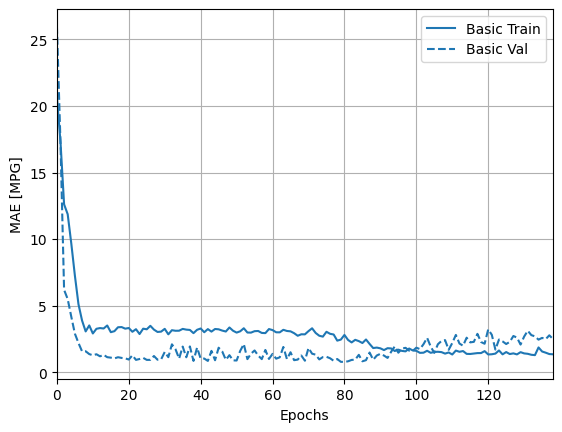

In [494]:
hist = pd.DataFrame(history.history)
a=hist.val_loss.min()
b=hist[hist.val_loss==a].reset_index()
c=b['index'].iloc[0]
print('Epochs min val_mae:')
print(hist[hist.val_loss==a].reset_index())
# print(hist[hist.val_loss==a].reset_index().iloc[0,0], hist[hist.val_loss==a].iloc[0]['loss'])
plotter = tfdocs.plots.HistoryPlotter()#smoothing_std=0.01)
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([a-a, a+a/2])
# plt.xlim([c-c/2, c+c])
plt.ylabel('MAE [MPG]')

In [495]:
yhat = model.predict(test_X)
yhat = yhat[:,0]
yhat = yhat.reshape((test_X.shape[0], 1))

In [496]:
yhat = model.predict(test_X)
import plotly.express as px
fig = px.line(yhat.reshape(-1))
fig.show()

In [497]:
# yhat = model.predict(test_X)
# yhat = yhat[:,0]
# x = pd.DataFrame(yhat)
# x['id'] = x.index
# x['id'] = x['id'] // (len(yhat)/test_X.shape[0]) 
# yhat = x.groupby('id')[0].mean().values
# yhat = yhat.reshape((test_X.shape[0], 1))

In [498]:
# Test_X = test_X.reshape((test_X.shape[0], n_days* (n_features+1)))
# inv_yhat = np.concatenate((Test_X[:, :n_features], yhat), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)

In [499]:
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = np.concatenate((Test_X[:, :n_features], test_y), axis=1)
# inv_y = scaler.inverse_transform(inv_y)

In [500]:
pd.DataFrame(test_y)

,0
0,20.18000
1,19.46406
2,19.45825
3,21.59722
4,21.86000
...,...
332,47.97200
333,47.69593
334,48.96948
335,46.51553


In [501]:
pd.DataFrame(yhat)

,0
0,19.829367
1,19.424801
2,19.203991
3,18.980822
4,19.781116
...,...
332,45.918724
333,44.676811
334,45.579918
335,45.387428


In [502]:
# inv_yhat = inv_yhat[:,-1]
# inv_y = inv_y[:,-1]

In [503]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_y[:50], yhat[:50])*100
print('Test MAPE: %.4f ' % mape + '%')

Test MAPE: 3.2297 %


In [504]:
len(yhat)

337

In [505]:
df_y = pd.DataFrame(test_y)
df_y.index = df.iloc[n_train_days+23+30:-n_days].index
# df_y.columns = df.columns
df_y.columns = ['High']
df_y['color'] = 'real'

df_yhat = pd.DataFrame(yhat)
df_yhat.index = df.iloc[n_train_days+23+30:-n_days].index
df_yhat.columns = ['High']
df_yhat['color'] = 'predict'

df_draw = pd.concat([df_y, df_yhat]).reset_index()

In [506]:
import plotly.express as px
fig = px.line(df_draw, x='d', y='High', color='color')
fig.show()

In [507]:
# yhat = model.predict(valid_X)
# yhat = yhat[:,0]
# x = pd.DataFrame(yhat)
# x['id'] = x.index
# x['id'] = x['id'] // (len(yhat)/valid_X.shape[0])
# yhat = x.groupby('id')[0].mean().values
# yhat = yhat.reshape((valid_X.shape[0], 1))

In [508]:
yhat = model.predict(valid_X)
yhat = yhat[:,0]
yhat = yhat.reshape((valid_X.shape[0], 1))

df_y = pd.DataFrame(valid_y)
df_y.index = df.iloc[n_train_days+23:n_train_days+23+30].index
# df_y.columns = df.columns
df_y.columns = ['High']
df_y['color'] = 'real'

df_yhat = pd.DataFrame(yhat)
df_yhat.index = df.iloc[n_train_days+23:n_train_days+23+30].index
df_yhat.columns = ['High']
df_yhat['color'] = 'predict'

df_draw = pd.concat([df_y, df_yhat]).reset_index()

In [509]:
len(yhat)

30

In [510]:
df_y

,High,color
d,,
2022-08-05,23.40200,real
2022-08-06,24.24500,real
2022-08-07,23.93325,real
2022-08-08,24.22600,real
2022-08-09,24.91854,real
2022-08-10,24.45650,real
2022-08-11,24.88800,real
2022-08-12,25.04756,real
2022-08-13,25.21132,real


In [511]:
import plotly.express as px
x = df_draw[(df_draw['d']>='2022-08-05')&(df_draw['d']<='2022-09-05')]
x = pd.merge(x[x['color']=='real'], x[x['color']=='predict'], on='d')
# x = x[(x['d']>='2022-08-05')&(x['d']<='2022-09-05')]
x['ae'] = x['High_y']-x['High_x']
x['ae'] = x['ae'].abs()
x['mape'] = x['ae']/x['High_x']*100
fig = px.bar(x, x='d', y='mape')
fig.show()

In [512]:
import plotly.express as px
x = df_draw[(df_draw['d']>='2022-08-05')&(df_draw['d']<='2022-09-05')]
x = pd.merge(x[x['color']=='real'], x[x['color']=='predict'], on='d')
# x = x[(x['d']>='2022-08-05')&(x['d']<='2022-09-05')]
x['ae'] = x['High_y']-x['High_x']
x['ae'] = x['ae'].abs()
x['mape'] = x['ae']/x['High_x']*100
import plotly.express as px
fig = px.line(df_draw[(df_draw['d']>='2022-08-05')&(df_draw['d']<='2022-09-05')], x='d', y='High', color='color')
fig.show()

In [513]:
print("MAPE")
print(round(x['mape'].mean(), 3), '%')

MAPE
2.413 %


In [407]:
model_name = f"{round(x['mape'].mean(), 3)}.keras"
# model.save(model_name)
model.save_weights(model_name)

In [411]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from tensorflow.keras.layers import LSTM, Dense
from attention import Attention
# from elephas.utils.rdd_utils import to_simple_rdd
# design network
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))

model.add(Attention(name='attention_weight'))
model.add(Dense(32, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.compile(loss='mse', metrics=['mae', 'mse'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))

In [412]:
model.load_weights(model_name)

In [413]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 2, 64)             18944     
_________________________________________________________________
attention_weight (Attention) (None, 128)               20480     
_________________________________________________________________
dense_36 (Dense)             (None, 32)                4128      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 43,585
Trainable params: 43,585
Non-trainable params: 0
_________________________________________________________________
